# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

CRISP DM Framework application
Goal: Identify what consumers value in used cars and make recommendations to maximize profit
Business understanding:
The objective here is to get a big picture understanding of what are the most important features valuable to clients and which features are most valuable determinants of used car prices? For a business to make money, the recommendation has to be applicable to a broad set of features and cover a wide variety of cars: in other words, being highly accurate over a very very small set of cars is not very useful. Therefore, the data would first be analyzed to draw big picture relevance for the business.

Data understanding:
The dataset is big: eliminating some data or making assumptions about missing data can have long range implications. Therefore, it would be critical to assess the dataset for the value of loss in information when certain data are eliminated or assumed.
An initial phase of just charting the data as-is may be necessary to get a feel for the dataset and feature cross-relationships. Charts such as scatterplots, boxplots, description of key statistics would be useful.
Initially, one might assume that the dependent variable would be Price and one would try to predict price given rest of data.
The existing data fields would have to be classified into 'numeric', 'ordinal', 'categorical'. Some fields would be irrelevant for forecasting and may be eliminated.
Numeric: 'year', 'odometer'
Categorical: 'manufacturer', 'model', 'fuel', 'title_status','transmission','drive','type','paint_color','state'
Ordinal: 'conditions', 'size'

Data preparation:
This step would probably be the most critical step so far: sanitising the data, working with missing fields, standardizing data and preparing data for various analyses: differenced series, or decision about taking data as-is would be crucial.

Modelling:
The modeling step would involve assessment of various modeling approaches and identifying which approach suits this exercise the best.
Various modeling techniques may be evaluated depending on the goal, beginning with simple models to explain feature relationships and later, more advanced models to predict a dependent variable.

Evaluation:
This step would involve evaluation of the model and to see how it performs on the test dataset. A practical evaluation of the model would also be necessary to assess the pragmatic relevance of the recommendations.

Feedback loop
This is a crucial step where the results/inferences need to be aligned with the business objective and the overall goal of the exercise. The feedback loop involves assessing the model output and realigning the model or redifining the goal to make sure the exercise is adding value to used car dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Data understanding:
The dataset is big: eliminating some data or making assumptions about missing data can have long range implications. Therefore, it would be critical to assess the dataset for the value of loss in information when certain data are eliminated or assumed.
An initial phase of just charting the data as-is may be necessary to get a feel for the dataset and feature cross-relationships. Charts such as scatterplots, boxplots, description of key statistics would be useful.
Initially, one might assume that the dependent variable would be Price and one would try to predict price given rest of data.
The existing data fields would have to be classified into 'numeric', 'ordinal', 'categorical'. Some fields would be irrelevant for forecasting and may be eliminated.
Numeric: 'year', 'odometer'
Categorical: 'manufacturer', 'model', 'fuel', 'title_status','transmission','drive','type','paint_color','state'
Ordinal: 'conditions', 'size'

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv('C:\\ml\\MLAI\\vehicles.csv')

In [3]:
df=df.dropna()
df=df.drop(columns=['size','VIN','id'],axis=1)
df=df.drop(columns=['region','model'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         34868 non-null  int64  
 1   year          34868 non-null  float64
 2   manufacturer  34868 non-null  object 
 3   condition     34868 non-null  object 
 4   cylinders     34868 non-null  object 
 5   fuel          34868 non-null  object 
 6   odometer      34868 non-null  float64
 7   title_status  34868 non-null  object 
 8   transmission  34868 non-null  object 
 9   drive         34868 non-null  object 
 10  type          34868 non-null  object 
 11  paint_color   34868 non-null  object 
 12  state         34868 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.7+ MB


In [4]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
126,0,2018.0,chevrolet,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,van,white,al
127,0,2019.0,chevrolet,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,van,white,al
128,0,2018.0,chevrolet,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,van,white,al
215,4000,2002.0,toyota,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,sedan,blue,al
219,2500,1995.0,bmw,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,12995,2016.0,chevrolet,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,sedan,silver,wy
426792,32999,2014.0,ford,excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,pickup,brown,wy
426793,15999,2018.0,chevrolet,excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,sedan,black,wy
426833,6800,1997.0,jaguar,good,8 cylinders,gas,69550.0,clean,automatic,rwd,convertible,white,wy


<Axes: >

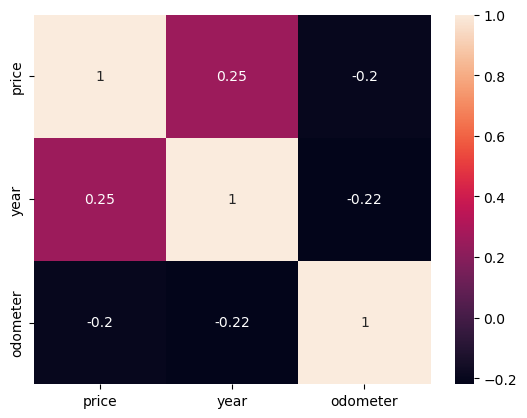

In [5]:
corr_df = df[['price','year','odometer']]
correl = corr_df.corr()
sns.heatmap(correl,annot=True)


In [6]:
df.describe()

,price,year,odometer
count,34868.000000,34868.000000,3.486800e+04
mean,15837.446771,2011.176867,1.073991e+05
std,13460.056823,7.162332,9.990878e+04
min,0.000000,1905.000000,0.000000e+00
25%,6500.000000,2008.000000,6.516400e+04
50%,12000.000000,2013.000000,1.040000e+05
75%,22003.500000,2016.000000,1.411678e+05
max,155000.000000,2022.000000,9.999999e+06


In [7]:
trimmed_df=df[(df['price'] <200000) & (df['price']>400)& (df['odometer'] <250000)];
y=trimmed_df['price'].astype(float);
X=trimmed_df.drop(columns='price', axis=1)


<Axes: xlabel='year', ylabel='price'>

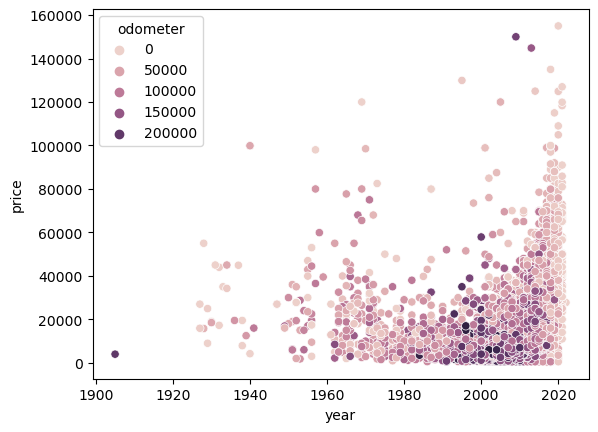

In [8]:
sns.scatterplot(trimmed_df,x='year',y='price',hue = 'odometer')

<Axes: xlabel='odometer', ylabel='price'>

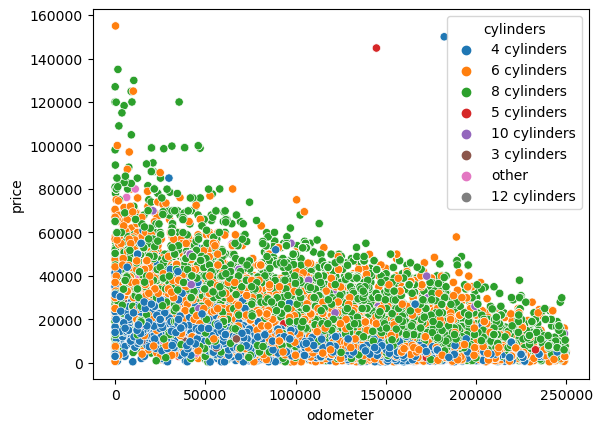

In [9]:
sns.scatterplot(trimmed_df,x='odometer',y='price',hue = 'cylinders')

<Axes: xlabel='drive', ylabel='price'>

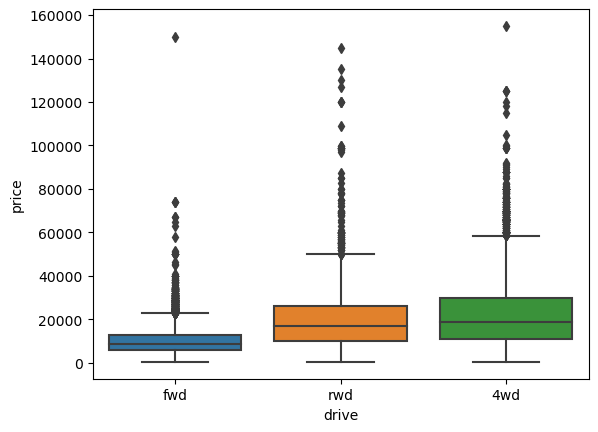

In [10]:
sns.boxplot(x="drive", y="price", data=trimmed_df)

<Axes: xlabel='cylinders', ylabel='price'>

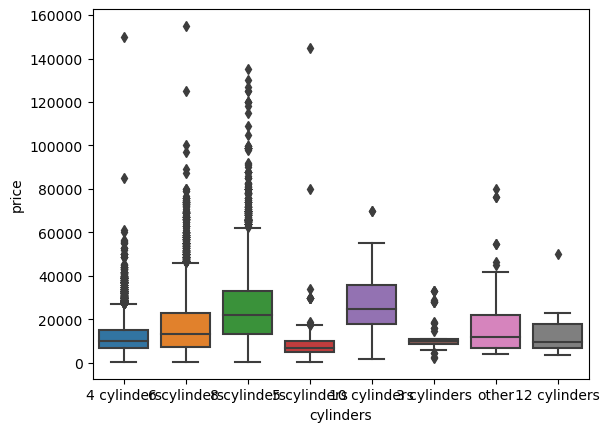

In [11]:
sns.boxplot(x="cylinders", y="price", data=trimmed_df)

In [12]:
use_cols=['manufacturer','fuel', 'title_status','transmission','drive','type','paint_color','state'];
filtered_X =  pd.get_dummies(X, columns=use_cols)


In [13]:
filtered_X['condition'] =  filtered_X['condition'] .map({'new':5, 'like new':4,'excellent':3, 'good':2,'fair':1, 'salvage':0})
filtered_X['cylinders'] =  filtered_X['cylinders'] .map({'3 cylinders':3, '4 cylinders':4, '5 cylinders':5, '6 cylinders':6, '8 cylinders':8,'10 cylinders':10, '12 cylinders':12, 'other':8})

Text(0, 0.5, 'counts')

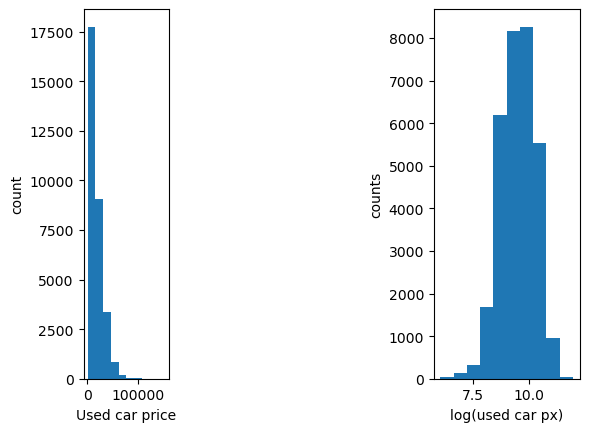

In [14]:
plt.subplot(1,5,1)
plt.hist(y)
plt.xlabel('Used car price')
plt.ylabel('count')
plt.subplot(1,3,3)
plt.hist(np.log(y))
plt.xlabel('log(used car px)')
plt.ylabel('counts')

In [15]:
X_lr = df[['year','odometer']]
y_lr = df[['price']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size = 0.3, random_state = 0)

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predicted=lr.predict(X_test)

In [18]:
lr.coef_[0]

array([ 4.09467442e+02, -1.64847373e-02])

In [19]:
lr.intercept_

array([-805844.21147444])

In [20]:
y_predicted=lr.predict(X_test)
y_predicted

array([[11794.25891926],
       [19203.68003824],
       [15621.55822765],
       ...,
       [12775.79619957],
       [19781.37117203],
       [20623.52999849]])

In [21]:
mse = mean_squared_error(y_test['price'], y_predicted)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(filtered_X, np.log(y), test_size=0.3, random_state = 42);

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [23]:
ridge_param_dict = {'ridge__alpha': np.logspace(0, 3, 50)}

ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                    ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe

Train MSE: 0.16828651372377335
Test MSE: 0.1691135510013887


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

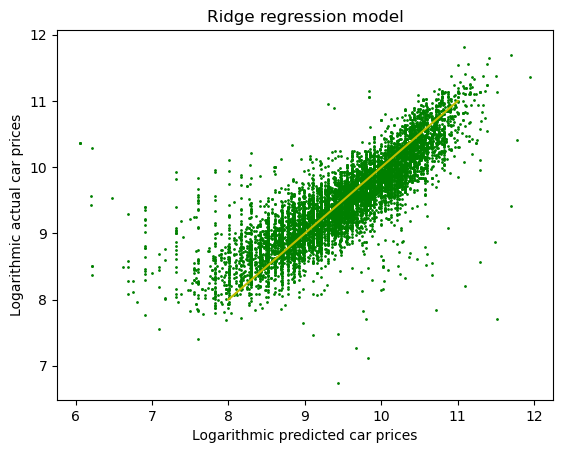

In [24]:
plt.plot(y_test, ridge_test_preds,'go' , markersize=1)
plt.xlabel('Logarithmic predicted car prices')
plt.ylabel('Logarithmic actual car prices')
plt.title('Ridge regression model')
# plot the diagonal line
plt.plot([8,11],[8,11], 'y-')

In [25]:
best_estimator = ridge_grid.best_estimator_
best_model = ridge_grid.best_estimator_.named_steps['ridge']
feature_names = X_train.columns
coefs_ridge = best_model.coef_

In [26]:
best_model

Ridge(alpha=159.98587196060572)

In [27]:
pd1=pd.DataFrame.from_dict({'feature_names':feature_names,'coef':coefs_ridge})
pd1['abs_coef']=abs(pd1.coef)

In [28]:
pd1=pd1.sort_values(by='abs_coef', ascending=False)
pd1.head(10)

,feature_names,coef,abs_coef
3,odometer,-0.321488,0.321488
0,year,0.210062,0.210062
2,cylinders,0.144040,0.144040
72,type_truck,0.104614,0.104614
71,type_sedan,-0.096448,0.096448
45,fuel_diesel,0.085115,0.085115
60,drive_fwd,-0.076559,0.076559
1,condition,0.076510,0.076510
47,fuel_gas,-0.068497,0.068497
59,drive_4wd,0.061427,0.061427


In [29]:
lasso_param_dict = {'lasso__alpha': np.logspace(-1.5, 2, 50)}

lasso_pipe = Pipeline([('scaler', StandardScaler()), 
                    ('lasso', Lasso())])
lasso_grid = GridSearchCV(lasso_pipe, param_grid=lasso_param_dict)
lasso_grid.fit(X_train, y_train)
lasso_train_preds = lasso_grid.predict(X_train)
lasso_test_preds = lasso_grid.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)

print(f'Train MSE: {lasso_train_mse}')
print(f'Test MSE: {lasso_test_mse}')
lasso_pipe

Train MSE: 0.19501917863739587
Test MSE: 0.19273296842579413


Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso())])

In [30]:
best_estimator1 = lasso_grid.best_estimator_
best_model1 = lasso_grid.best_estimator_.named_steps['lasso']
feature_names = X_train.columns
coefs_lasso = best_model1.coef_

In [31]:
best_model1


Lasso(alpha=0.03162277660168379)

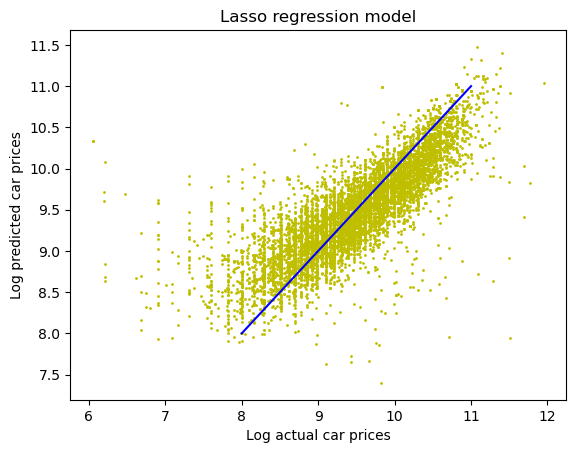

In [32]:
plt.plot(y_test,lasso_test_preds,'yo',markersize=1)
plt.xlabel('Log actual car prices')
plt.ylabel('Log predicted car prices')
plt.title('Lasso regression model')
plt.plot([8,11],[8,11], 'b-')

In [33]:
pd2=pd.DataFrame.from_dict({'feature_names':feature_names,'coef':coefs_lasso})
pd2['abs_coef']=abs(pd2.coef)

In [34]:
pd2=pd2.sort_values(by='abs_coef', ascending=False)
pd2.head(10)

,feature_names,coef,abs_coef
3,odometer,-0.296164,0.296164
0,year,0.196471,0.196471
2,cylinders,0.144738,0.144738
45,fuel_diesel,0.134042,0.134042
60,drive_fwd,-0.130482,0.130482
72,type_truck,0.095690,0.095690
71,type_sedan,-0.068585,0.068585
1,condition,0.056272,0.056272
70,type_pickup,0.024737,0.024737
59,drive_4wd,0.012738,0.012738


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Starting with initial set of scatter plots and box plots, we first determined the key relationships among data.
We then sanitized the data with standard sanitization methods.
Then we built linear regression model to just get a basic level of understanding about 2 main drivers of prices from  visual inspection only.
Then we expanded the analysis to perform grid search super parameter selection on ridge and lasso regressions.
Results are comparable: odometer, year, cylinders, drive, condition, type, fuel are primary determinants of prices.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Key takeways are (some quite intuitive):
Ageing of cars and greater run (mileage) adversely affect prices. Higher number of cylinders provide price support. As the drive expands to all-wheel the car value increases.
As evidenced in the initial scatter plot, diesel vehicles tend to have higher price vs. gas, and similarly trucks over sedans.

As a final note, modeling was also explored with 2 degree polynomial pipeline but that was't quite effective: neither in terms of time taken to model, nor in terms of the ability to model. One was forced to reduce the features dramatically to ensure the model is able to complete a run. Otherwise the current computing power was found to be inadquate on my computer to run polynomial for a large number of features. As such, even with feature reduction, the incremental value wasn't quite there. The results are not included but the alteration to code is shown below:

ridge_param_dict = {'ridge__alpha': np.logspace(0, 3, 50)}

ridge_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                    ('scaler', StandardScaler()), 
                    ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe
.......................
lasso:
lasso_param_dict = {'lasso__alpha': np.logspace(-1.5, 2, 50)}

lasso_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                    ('scaler', StandardScaler()), 
                    ('lasso', Lasso())])
lasso_grid = GridSearchCV(lasso_pipe, param_grid=lasso_param_dict)
lasso_grid.fit(X_train, y_train)
lasso_train_preds = lasso_grid.predict(X_train)
lasso_test_preds = lasso_grid.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)

print(f'Train MSE: {lasso_train_mse}')
print(f'Test MSE: {lasso_test_mse}')
lasso_pipe